# SALIFORT MOTOR EMPLOYEE CHURN PREDICTION MODEL

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Boxplot to detect outliers')

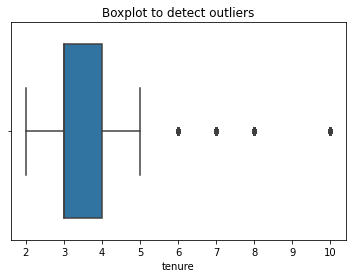

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df1['tenure'])
plt.title('Boxplot to detect outliers')


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
#compute the 25th percentile 
percentile_25 = df1['tenure'].quantile(0.25)

#compute the 75th percentile 
percentile_75 = df1['tenure'].quantile(0.75)

# compute the interquantile range 
iqr = percentile_75-percentile_25

upper_limit = percentile_75 + (1.5 * iqr)
lower_limit = percentile_25 - (1.5 * iqr)

print('Lower limit = ', lower_limit)
print('Upper Limit = ', upper_limit)

outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] <lower_limit)]

print(len(outliers))


Lower limit =  1.5
Upper Limit =  5.5
824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts()/len(df1['tenure']))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Employee Satisfaction level Histogram')

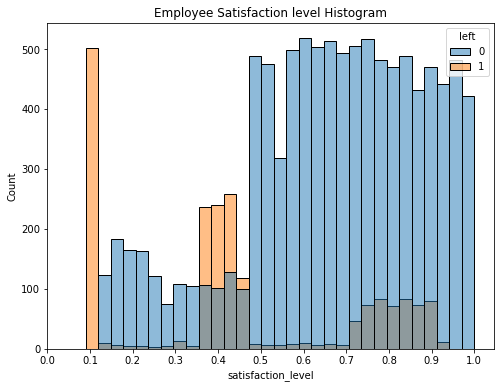

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))

sns.histplot(df1, x='satisfaction_level', hue='left')
plt.xticks(ticks=[0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
plt.title('Employee Satisfaction level Histogram')

Text(0.5, 1.0, 'Number of projects Histogram')

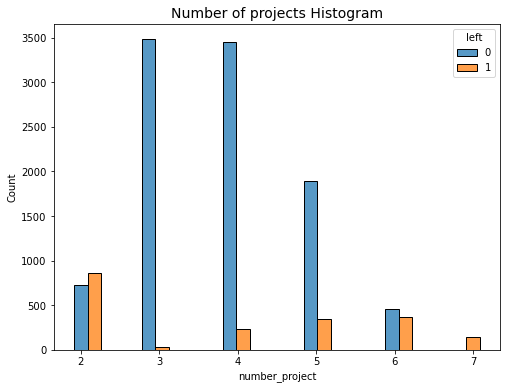

In [15]:
# Create a histogram distribution of 'number_project' and comparing it with employees that left versus stayed
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)
plt.title('Number of projects Histogram', fontsize=14)

Text(0.5, 1.0, 'Monthly Hours by Number of Projects')

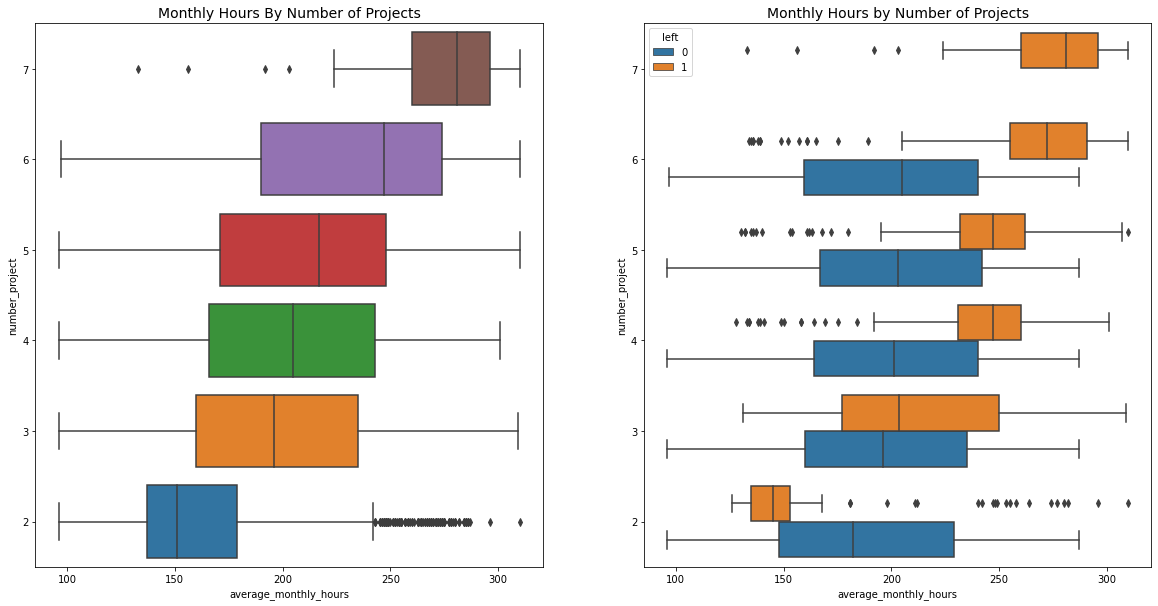

In [16]:
# Create a a boxplot 
### YOUR CODE HERE ###
fig, ax =plt.subplots(1,2, figsize=(20,10))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours By Number of Projects', fontsize=14)


#create the above boxplot showing the employees that stayed versus those that left 
sns.boxplot(data = df1, x='average_monthly_hours', y='number_project', orient='h', hue='left', ax=ax[1])
ax[1].invert_yaxis()
plt.title('Monthly Hours by Number of Projects', fontsize=14)



Text(0.5, 1.0, 'Satisfaction Level based on Average Monthly Spent ')

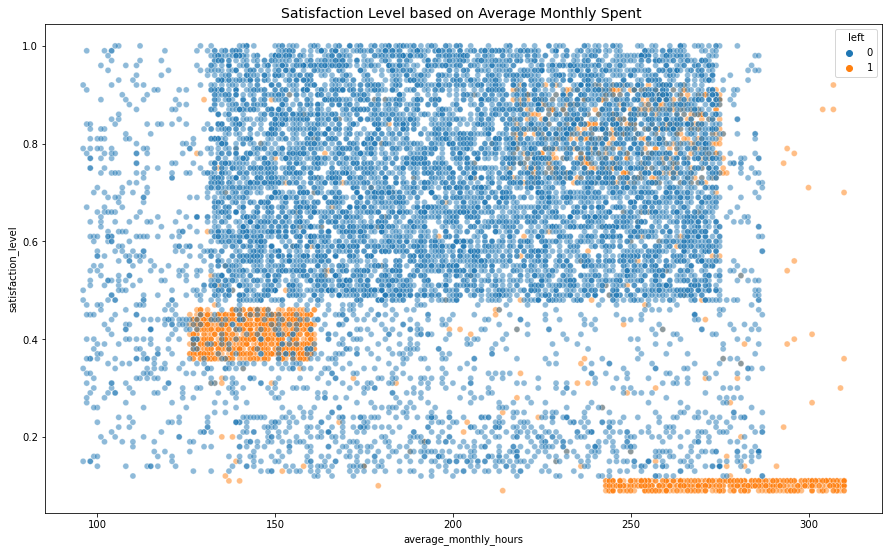

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
#create a scatterplot of average_monthly_hours versus 'satisfaction_level' comparing with employees that stay with those that left 
plt.figure(figsize=(15,9))
sns.scatterplot(data=df1, x= 'average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.title('Satisfaction Level based on Average Monthly Spent ', fontsize=14)

Text(0.5, 1.0, 'Evaluation Score based on Satisfaction Level')

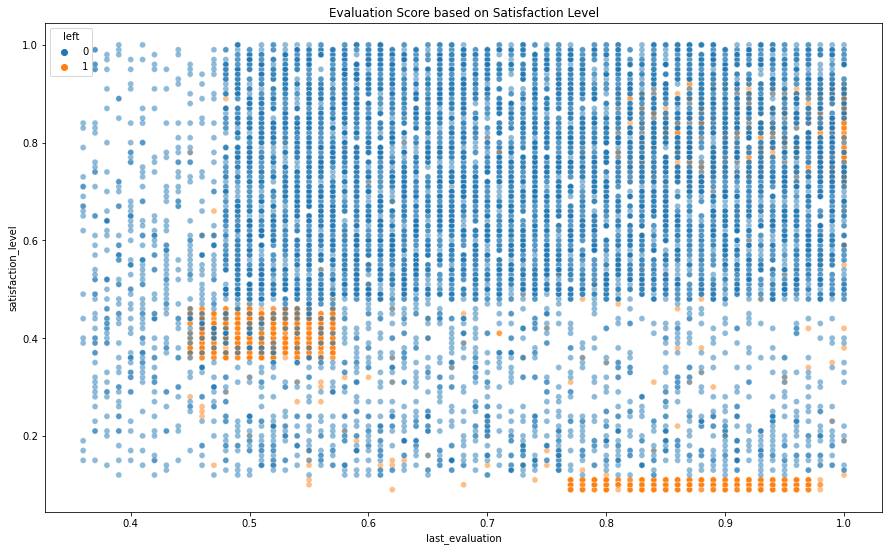

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a scatter plot between the last_evaluation score, and satisfaction_level
plt.figure(figsize=(15,9))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.5)
plt.title('Evaluation Score based on Satisfaction Level')

Text(0.5, 1.0, 'Evaluation Score based on Average Monthly Hours')

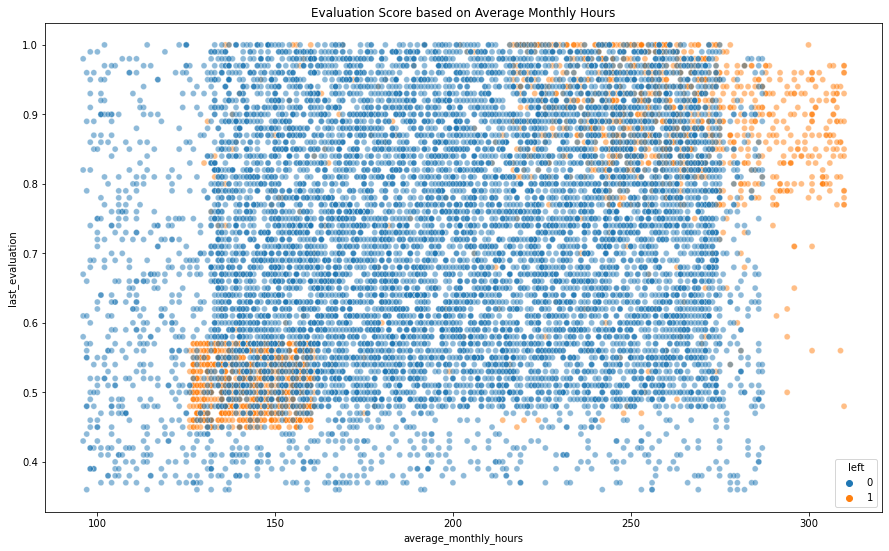

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.title('Evaluation Score based on Average Monthly Hours')

Text(0.5, 1.0, 'Satisfaction Level based on Number of Year spent in Company')

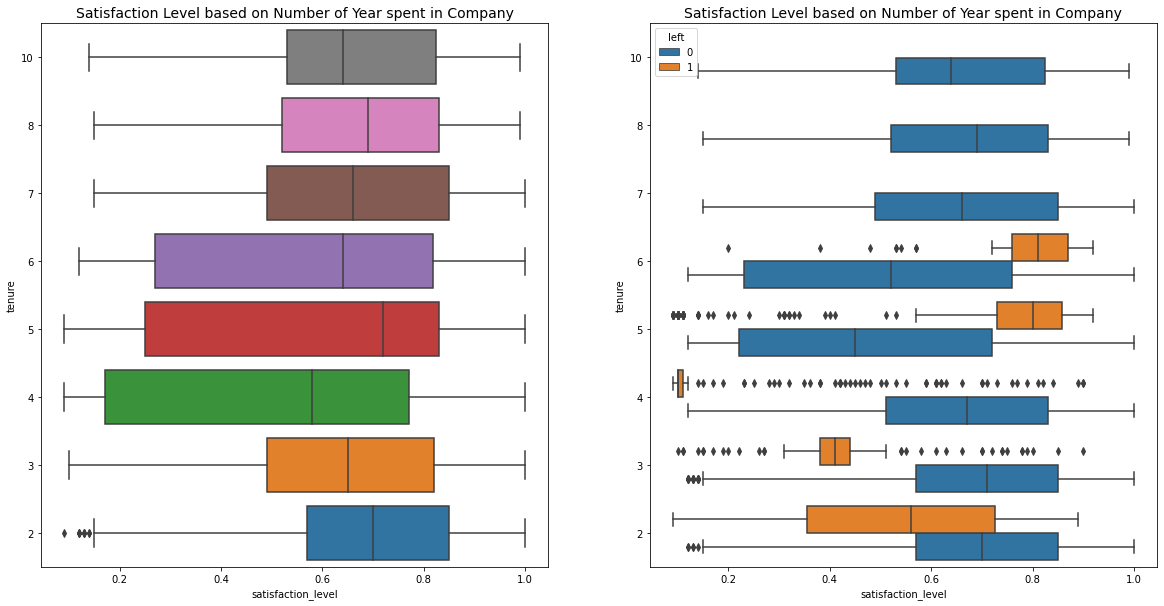

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax =plt.subplots(1,2, figsize=(20,10))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction Level based on Number of Year spent in Company', fontsize=14)


#create the above boxplot showing the employees that stayed versus those that left 
sns.boxplot(data = df1, x='satisfaction_level', y='tenure', orient='h', hue='left', ax=ax[1])
ax[1].invert_yaxis()
plt.title('Satisfaction Level based on Number of Year spent in Company', fontsize=14)



In [21]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

<Figure size 792x576 with 0 Axes>

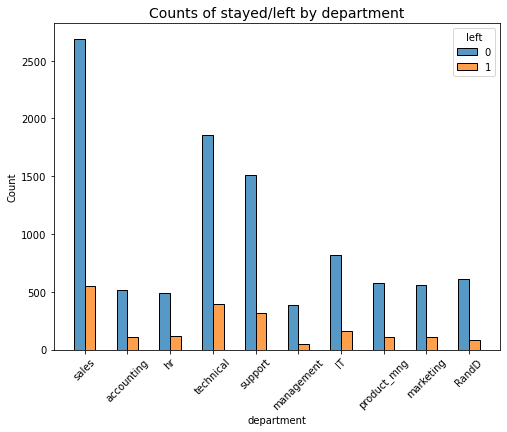

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
plt.figure(figsize=(8,6))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=.5, hue_order=[0,1])
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


Text(0.5, 1.0, 'Correlation Heatmap')

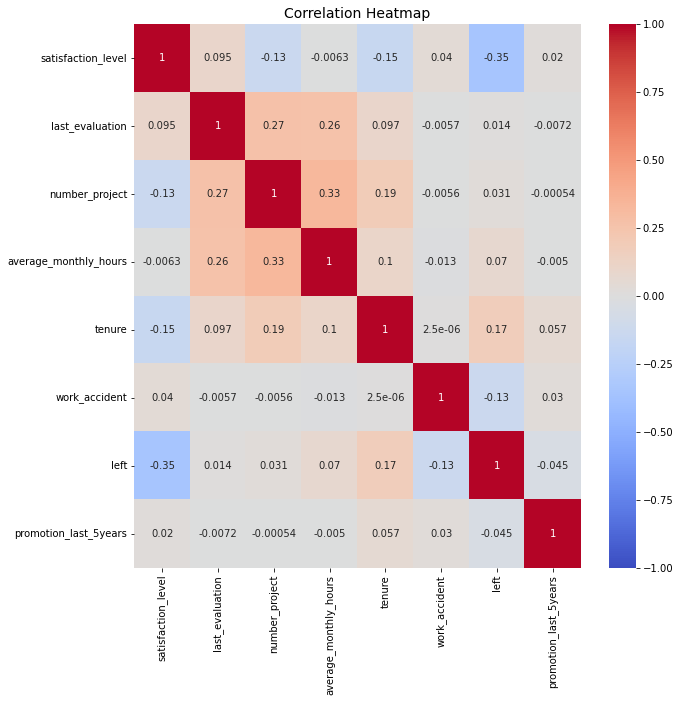

In [23]:
#Plot a Heatmap to show the correlation between the variables 
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap", fontsize=14)


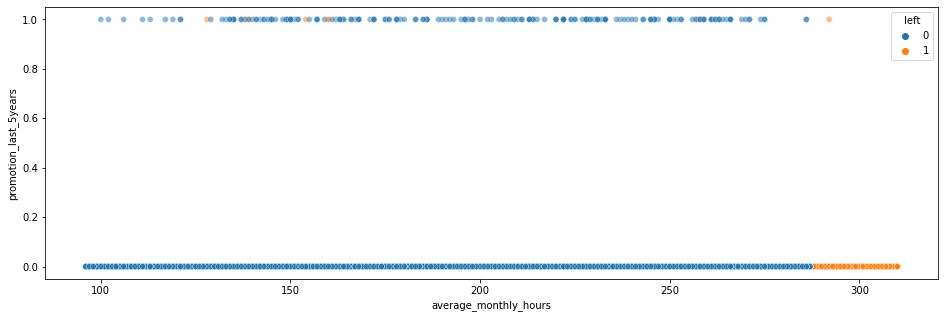

In [24]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5, )

## INSIGHTS 

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare

## MODELLING 

### Modelling Approach A: Logistic Regression 


In [25]:
### YOUR CODE HERE ###
#make a copy the dataframe 
df_encode =df1.copy()

# Encode the 'salary' column 
df_encode['salary'] = (
    df_encode['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# One Hot Encode the Department Column
df_encode = pd.get_dummies(df_encode, drop_first=False)

# Display the new dataframe 

df_encode.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Heatmap of the Variables')

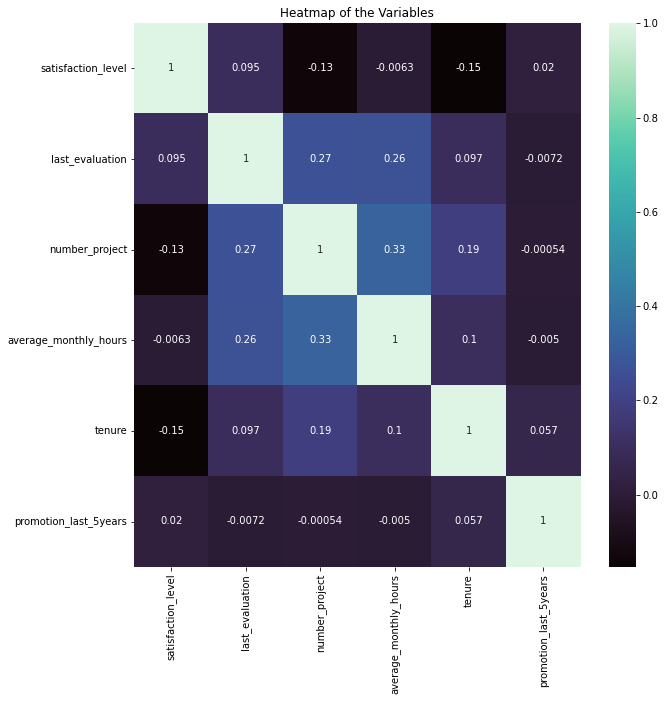

In [29]:
#create a heatmap to show correlation between the different dependent variables 
plt.figure(figsize=(10,10))
sns.heatmap(df_encode[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
                           'tenure', 'promotion_last_5years']].corr(), cmap='mako', annot=True)
plt.title('Heatmap of the Variables')


Since Logistic Regression does not do well with outliers, we are going to remove the outliers from the tenure column

In [30]:
# select the dataframe excluding the outliers and save it into another variable 
df_logreg1 = df_encode[(df_encode['tenure']>= lower_limit) & (df_encode['tenure']<= upper_limit)]

#Display the First few rows of the new DataFrame 
df_logreg1.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Instantiate the dependent variable and the independent variables 

In [31]:
# drop the outcome variable to leave only the features in the model 
X = df_logreg1.drop('left', axis=1)

# Store the outcome variable 
y= df_logreg1['left']

Split the data into the training data and testing data 

In [32]:
# Don't forget to stratify on y because the classes are not balance 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

Construct a Logistic Regression Model anf fit the training data into the model 

In [33]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Make the Model to make Prediction on the Testing data 

In [34]:
y_pred = log_clf.predict(X_test)

Create a confusion Matrix to visualize the predictions of the Model 

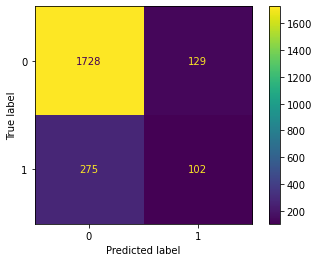

In [35]:
# Compute values for the Confusion Matrix 
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

#Create the Confusion Matrix Display 
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                display_labels=log_clf.classes_ )

log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [ ]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

### Checking for Class balance 

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [37]:
df_logreg1['left'].value_counts()/len(df_logreg1['left'])

0    0.831468
1    0.168532
Name: left, dtype: float64

This show there is 83% to 17% split in between the classes. We can upsample the the Minority class and retrain the model 

In [38]:
from sklearn.utils import resample

# upsample the minority class 
df_majority = df_logreg1[df_logreg1['left']==0]
df_minority = df_logreg1[df_logreg1['left']==1]

df_minority_upsample = resample(df_minority, replace=True, n_samples= len(df_majority))


# Combined the upsampled data with the Majority dataframe and store into a new variables 
df_logreg2 = pd.concat([df_majority, df_minority_upsample])

# seperate the Outcome variable from the Model features 
X = df_logreg2.drop('left', axis =1)

y= df_logreg2['left']

# Split the data into the training and testing data and stratify y 
X_train, X_test,y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 42)

# Construct the Logistic regression model and fit the training data into the model 
log_clf2 = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Use the test data to predict 
y_pred2 = log_clf2.predict(X_test)

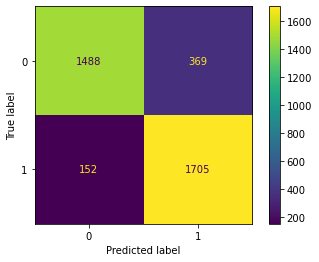

In [39]:
# Compute values for the Confusion Matrix 
log_cm = confusion_matrix(y_test, y_pred2, labels=log_clf2.classes_)

#Create the Confusion Matrix Display 
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                display_labels=log_clf2.classes_ )

log_disp.plot(values_format='')

plt.show()

In [41]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.91      0.80      0.85      1857
    Predicted would leave       0.82      0.92      0.87      1857

                 accuracy                           0.86      3714
                macro avg       0.86      0.86      0.86      3714
             weighted avg       0.86      0.86      0.86      3714



This shows the Logistic Regression predicted would leave have 82% precision, 92% recall, 87% F1 score which tells that the model can acurately predict that the employees will stay or leave. 

Note that `logistic Regression` doesn't perform well with multicollinearity between the model features. Thus, it is advisable to compare the results by building a Decision tree 

#### DECISION TREE MODELLING 

Decision trees requires no assumption on the data distibution. That means it can handle class imbalance very well.
It handles collinearity very easily 


In [42]:
# Isolate the Outcome Variable 
y = df_encode['left']

# Select the Model Features 
X= df_encode.drop('left', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X , y, stratify =y, test_size=0.2, random_state=42)

In [44]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
# Fit decision tree Model into the training data 
%time
tree1.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.58 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [47]:
# Check the model best parameters 
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [48]:
# Check the AUC score 
tree1.best_score_

0.9723763685033361

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search.

In [49]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [50]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.966421,0.915878,0.940424,0.980713,0.972376


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make pedictions 

#### Random Forest Modelling 

In [61]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the model into the training data 

In [62]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 49s, sys: 1.46 s, total: 9min 50s
Wall time: 9min 50s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Specify path to where you want to save your model.

In [63]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Define functions to pickle the model and read in the model.

In [64]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [65]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [66]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [67]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [68]:
# Identify best AUC score of the Random Forest Model on the training data 
rf1.best_score_

0.9811081894824805

In [69]:
# Check the best parameters 
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [70]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966421  0.915878  0.940424  0.980713  0.972376
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.981054  0.906457  0.942244  0.981547  0.981108


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [71]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [72]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.989276,0.927136,0.957198,0.986244,0.962568


The test scores are very similar to the training scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

### Featuring Engineering 

Feature engineering is the process of creating new features or transforming existing features in a dataset to improve the performance of machine learning models. It involves extracting relevant information from raw data and representing it in a more informative and useful way for the model.

In [73]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_encode.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


You could define being overworked as working more than 175 hours per month on average.

To make the overworked column binary, you could reassign the column using a boolean mask.

df3['overworked'] > 175 creates a series of booleans, consisting of True for every value > 175 and False for every values ≤ 175
.astype(int) converts all True to 1 and all False to 0

In [76]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [77]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [78]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [80]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

#### Decison Tree Modelling Part B 

In [81]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [82]:
# Fit the training dats into the model 
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [83]:
# Check the best Parameters 
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [85]:
# Check the Best AUC score of the model on the training data 
tree2.best_score_

0.9566616249826686

In [86]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966421  0.915878  0.940424  0.980713  0.972376
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.796946  0.902057  0.846159   0.94558  0.956662


In [100]:
tree2_test_scores = get_scores('Decision Tree Model', tree2, X_test, y_test)
tree2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree Model,0.796976,0.927136,0.857143,0.948729,0.94008


#### RANDOM FOREST  MODEL PART B

In [87]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [88]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 7min 20s, sys: 998 ms, total: 7min 21s
Wall time: 7min 21s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [89]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [90]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [91]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [92]:
# Check best AUC score on CV
rf2.best_score_

0.9664526590338437

In [93]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.796946  0.902057  0.846159   0.94558  0.956662
               model  precision   recall        F1  accuracy       auc
0  random forest2 cv   0.846303  0.90709  0.875542  0.957152  0.966453


The random Forest model performed better than the Decision tree model 

In [94]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.815556,0.922111,0.865566,0.95248,0.940316


Plot a Confusion Matrix to see how well the model predicted 

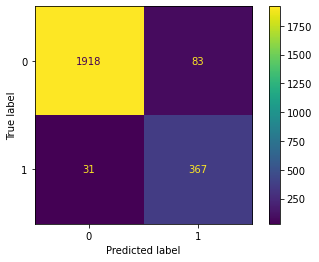

In [95]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

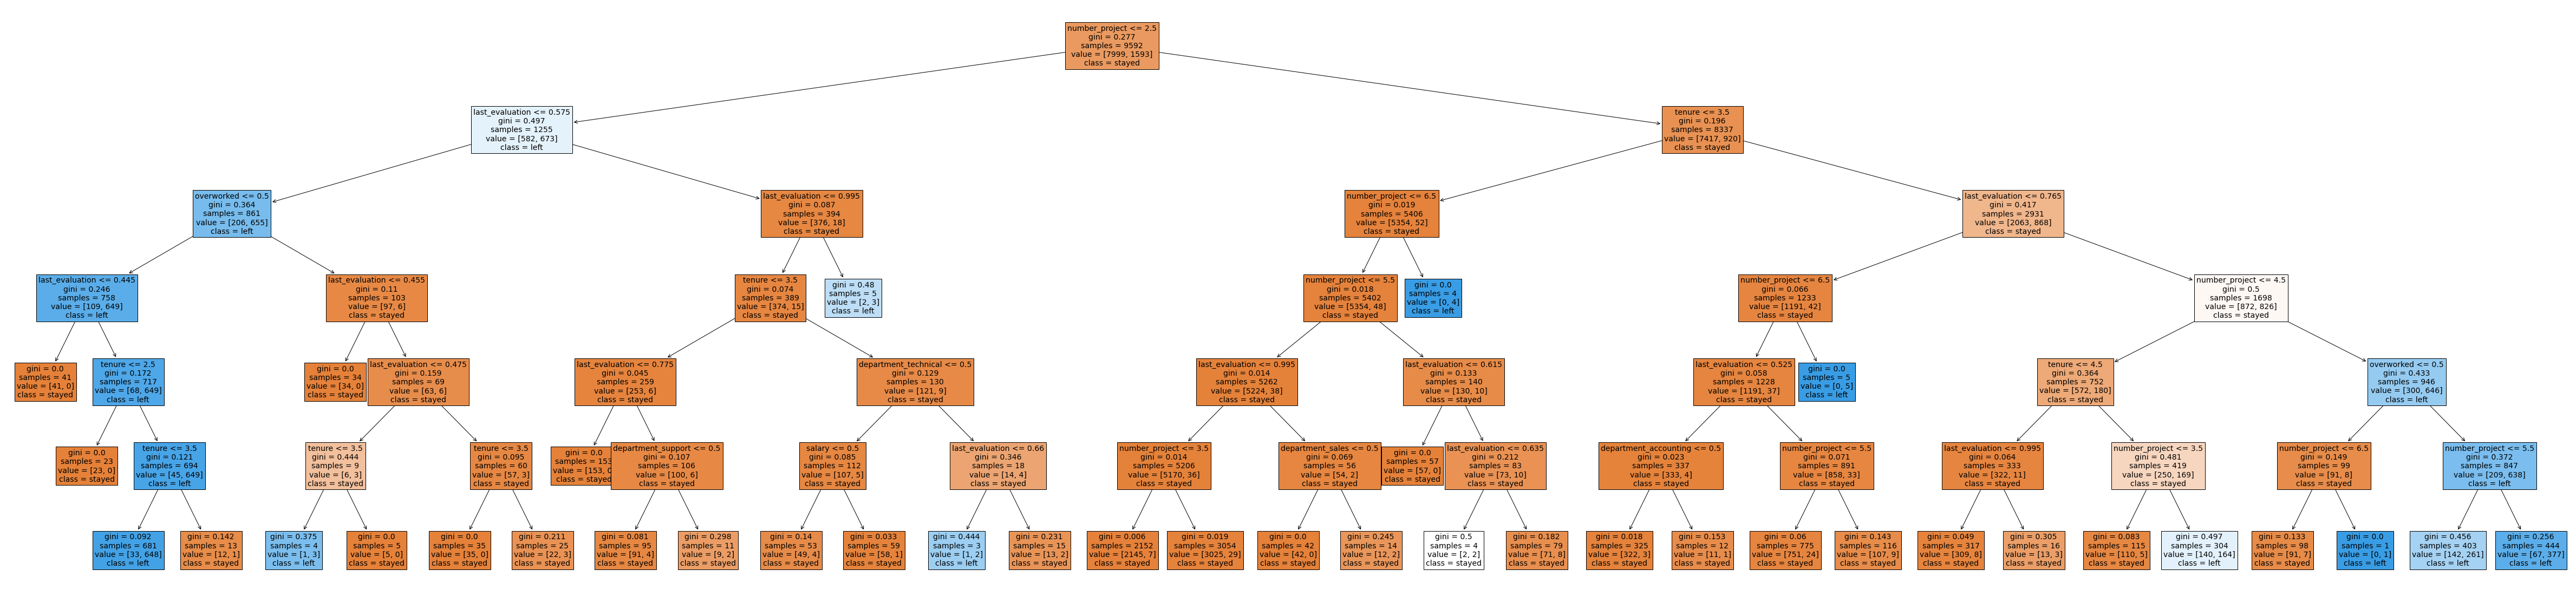

In [96]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [97]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.337322
number_project,0.335779
tenure,0.223045
overworked,0.102747
department_technical,0.000514
department_sales,0.000225
department_support,0.000202
salary,0.000100
department_accounting,0.000067


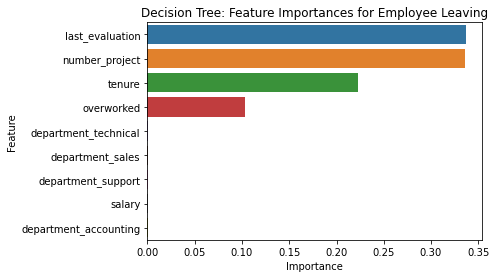

In [98]:
#create a barplot to visualize the feature importance of decision tree model
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

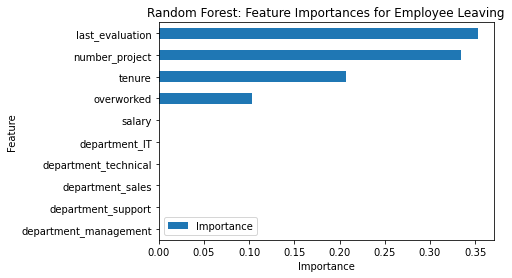

In [99]:
# Plot the Random Forest Feature Model barplot
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Summary of model results

**Logistic Regression**

This shows the Logistic Regression predicted would leave have 82% precision, 92% recall, 87% F1 score. 


**Tree-based Machine Learning**

After conducting feature engineering, the random forest model achieved AUC of 94.0%,  precision of 81.6%, recall of 86.6%, f1-score of 95.3%, and accuracy of 96.2%, on the test set. Where as the decsion tree model achieved AUC of 94%, precision of 79.7%, recall of 92.7%, f1-score of 85.7% and accuuracy of 94.9%. This reveals the modellings are relative to stable to be used in predicting the data. 


### Conclusion, Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

